ML BANK

LOAD DATA   

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score

In [231]:
df = pd.read_csv('Resources/loan_data.csv')

In [232]:
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [233]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [235]:
df.shape

(45000, 14)

In [236]:
df.isnull().mean() * 100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

In [237]:
# Drop any null records
df = df.dropna()

In [238]:
# Validate that null records have been dropped
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [239]:
df = df.drop_duplicates()

In [240]:
# Check whether any rows were dropped
df.count()

person_age                        45000
person_gender                     45000
person_education                  45000
person_income                     45000
person_emp_exp                    45000
person_home_ownership             45000
loan_amnt                         45000
loan_intent                       45000
loan_int_rate                     45000
loan_percent_income               45000
cb_person_cred_hist_length        45000
credit_score                      45000
previous_loan_defaults_on_file    45000
loan_status                       45000
dtype: int64

DATA VISUALIZATION

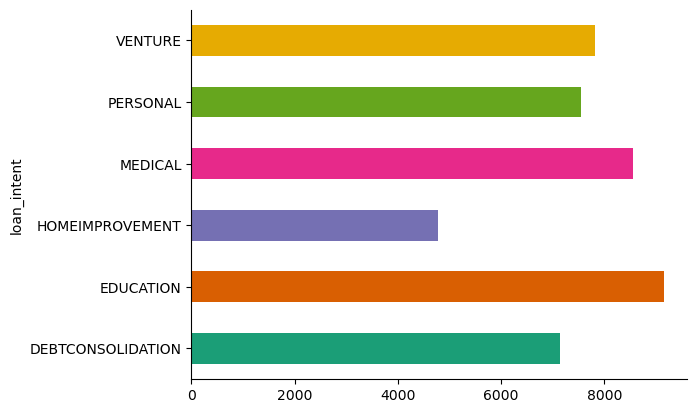

In [241]:
# @title loan_intent
df.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

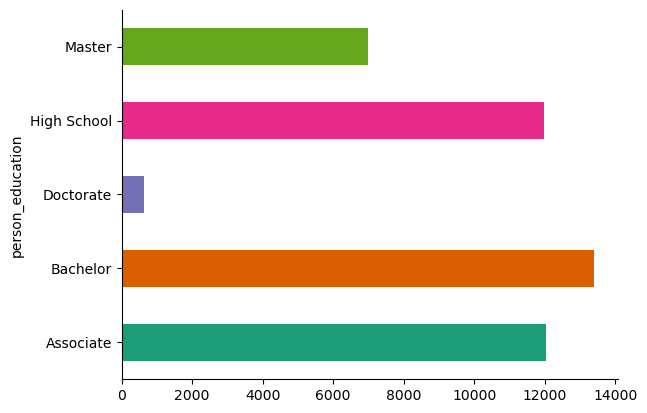

In [242]:
# @title person_education
df.groupby('person_education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

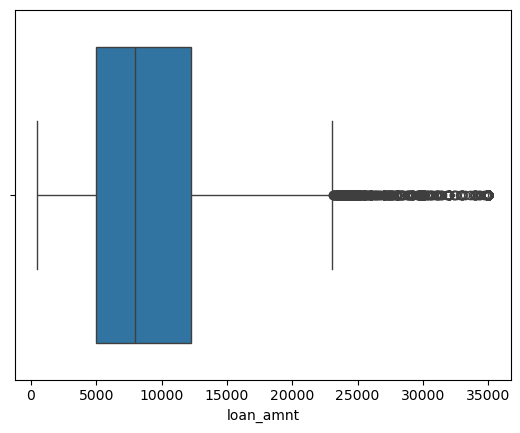

In [243]:
sns.boxplot(data=df,x='loan_amnt')
plt.show()

CLEAN UP INCOME & AGE OUTLIERS

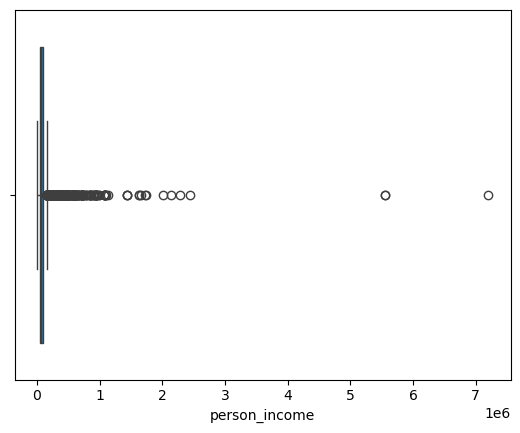

In [244]:
sns.boxplot(data=df,x='person_income')
plt.show()

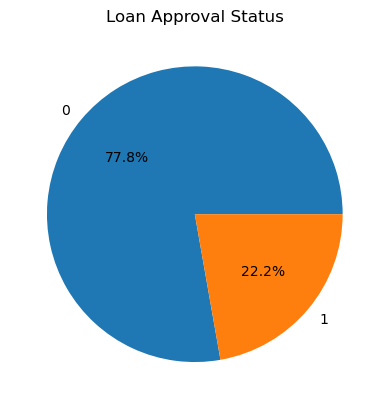

In [245]:
temp = df['loan_status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.title('Loan Approval Status')
plt.show()
#plt.savefig('Resources/Loan_Approval_Status.png')

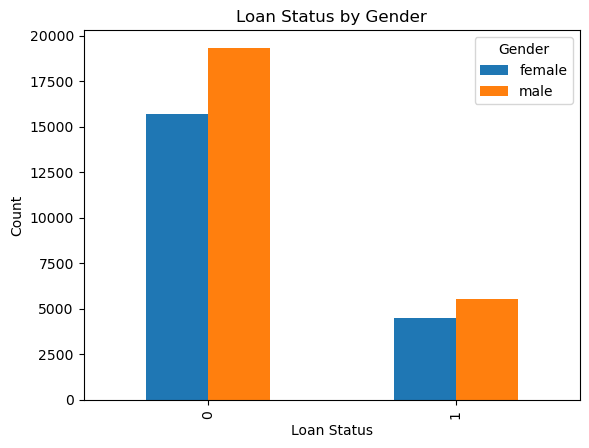

In [246]:
# Group by 'loan_status' and 'person_gender' and count
grouped_data = df.groupby(['loan_status', 'person_gender']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status by Gender')
plt.legend(title='Gender')
plt.show()
#plt.savefig('Resources/Loan_Status_Gender.png')


DATA PREPARATION

USE OneHotEncoder TO TRANSFORM CATEGORICAL COLUMNS THAT ARE NOMINAL

In [247]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_categorical_features = encoder.fit_transform(df[['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])
encoded_df = pd.DataFrame(encoder_categorical_features, columns=encoder.get_feature_names_out())

In [248]:
encoded_df.head()

person_gender_female  person_gender_male  person_home_ownership_MORTGAGE  \
0                   1.0                 0.0                             0.0   
1                   1.0                 0.0                             0.0   
2                   1.0                 0.0                             1.0   
3                   1.0                 0.0                             0.0   
4                   0.0                 1.0                             0.0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                          0.0                        0.0   
1                          0.0                        1.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         1.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         1.0                            0.0   
4                         1.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    0.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  1.0   
3                    0.0                          0.0                  1.0   
4                    0.0                          0.0                  1.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   1.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                1.0                                 0.0  
1                                0.0                                 1.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0

USE LABEL ENCODER TO TRANSFORM CATEGORICAL COLUMN THAT IS ORDINAL

In [249]:
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['person_education'])
new_df = pd.concat([df, encoded_df], axis=1)

In [250]:
new_df.drop(['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_education'], axis=1, inplace=True)

In [251]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   education_encoded                   45000 non-null  int32  
 10  person_gender_female                45000 non-null  float64
 11  person_gender_male                  45000

PCA Analysis & Data Visualization

In [252]:
new_df.head()
super_new = new_df.copy()
super_new.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                         3.0           561            1   
1                 0.08                         2.0           504            0   
2                 0.44                         3.0           635            1   
3                 0.44                         2.0           675            1   
4                 0.53                         4.0           586            1   

   education_encoded  ...  person_home_ownership_OWN  \
0                  4  ...                        0.0   
1                  3  ...                        1.0   
2                  3  ...                        0.0   
3                  1  ...                        0.0   
4                  4  ...                        0.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         1.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         1.0                            0.0   
4                         1.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    0.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  1.0   
3                    0.0                          0.0                  1.0   
4                    0.0                          0.0                  1.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   1.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                1.0                                 0.0  
1                                0.0                                 1.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0  

[5 rows x 24 columns]

In [253]:
pca_scaled = StandardScaler().fit_transform(new_df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']])
pca_scaled

array([[-0.95353824, -0.10408961, -0.89228413, ...,  4.01639414,
        -0.73910854, -1.41981408],
       [-1.11896309, -0.84600467, -0.89228413, ..., -0.6848294 ,
        -0.99686317, -2.5499748 ],
       [-0.45726369, -0.84406489, -0.3975175 , ...,  3.4430742 ,
        -0.73910854,  0.04741211],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ..., -1.02882137,
         1.06517387,  0.70171569],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  2.52576229,
         0.03415535, -0.5672367 ],
       [-0.62268854, -0.35699428, -0.72736192, ..., -0.11150946,
        -0.73910854, -0.09137955]])

In [254]:
df_pca_scaled = pd.DataFrame(pca_scaled, columns=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'])

In [255]:
super_new.drop(['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'], axis=1, inplace=True)


In [256]:

df_pca = pd.merge(df_pca_scaled, super_new, left_index=True, right_index=True)
df_pca.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -0.953538      -0.104090       -0.892284   4.024953       1.683039   
1   -1.118963      -0.846005       -0.892284  -1.359209       0.044782   
2   -0.457264      -0.844065       -0.397517  -0.646600       0.625557   
3   -0.788113      -0.007039       -0.892284   4.024953       1.417829   
4   -0.622689      -0.176371       -0.727362   4.024953       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0             4.016394                   -0.739109     -1.419814            1   
1            -0.684829                   -0.996863     -2.549975            0   
2             3.443074                   -0.739109      0.047412            1   
3             3.443074                   -0.996863      0.840507            1   
4             4.475050                   -0.481354     -0.924130            1   

   education_encoded  ...  person_home_ownership_OWN  \
0                  4  ...                        0.0   
1                  3  ...                        1.0   
2                  3  ...                        0.0   
3                  1  ...                        0.0   
4                  4  ...                        0.0   

   person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
0                         1.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         1.0                            0.0   
4                         1.0                            0.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    0.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  1.0   
3                    0.0                          0.0                  1.0   
4                    0.0                          0.0                  1.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   1.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
0                                1.0                                 0.0  
1                                0.0                                 1.0  
2                                1.0                                 0.0  
3                                1.0                                 0.0  
4                                1.0                                 0.0  

[5 rows x 24 columns]

In [257]:
features = ['person_income', 'credit_score', 'loan_amnt', 'person_emp_exp'] 
X = df_pca[features]
df_kmeans = df_pca.copy()
kmeans = KMeans(n_clusters=2)
df_kmeans['cluster'] = kmeans.fit_predict(X)
df_kmeans.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -0.953538      -0.104090       -0.892284   4.024953       1.683039   
1   -1.118963      -0.846005       -0.892284  -1.359209       0.044782   
2   -0.457264      -0.844065       -0.397517  -0.646600       0.625557   
3   -0.788113      -0.007039       -0.892284   4.024953       1.417829   
4   -0.622689      -0.176371       -0.727362   4.024953       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0             4.016394                   -0.739109     -1.419814            1   
1            -0.684829                   -0.996863     -2.549975            0   
2             3.443074                   -0.739109      0.047412            1   
3             3.443074                   -0.996863      0.840507            1   
4             4.475050                   -0.481354     -0.924130            1   

   education_encoded  ...  person_home_ownership_RENT  \
0                  4  ...                         1.0   
1                  3  ...                         0.0   
2                  3  ...                         0.0   
3                  1  ...                         1.0   
4                  4  ...                         1.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  previous_loan_defaults_on_file_No  \
0                  0.0                                1.0   
1                  0.0                                0.0   
2                  0.0                                1.0   
3                  0.0                                1.0   
4                  0.0                                1.0   

   previous_loan_defaults_on_file_Yes  cluster  
0                                 0.0        0  
1                                 1.0        1  
2                                 0.0        1  
3                                 0.0        0  
4                                 0.0        0  

[5 rows x 25 columns]

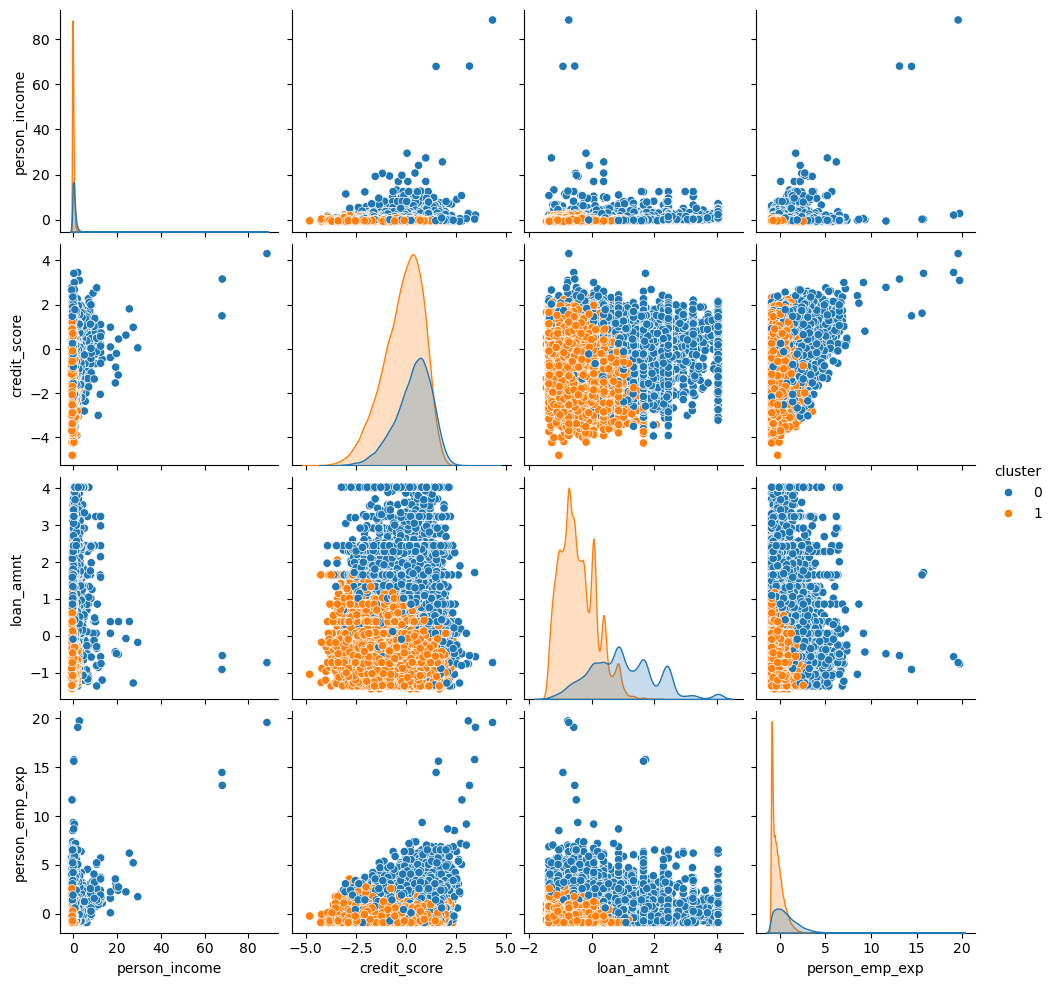

In [258]:
sns.pairplot(df_kmeans[features + ['cluster']], hue='cluster')
plt.show()

In [259]:
pca=PCA(n_components=10)
customers_pca = pca.fit_transform(df_pca)
customers_pca[:5]

array([[-1.71358594,  2.05601393,  6.04273039,  0.65603911, -0.90766604,
         0.88934033,  0.40547751, -0.75481473,  0.27430262, -0.27572765],
       [-2.36950635,  1.12819365, -1.44688516, -0.25060897, -1.41339355,
         1.89946399, -0.17703358, -0.79175611, -0.13075518,  0.33223811],
       [-1.20823381,  1.15699497,  2.3574036 , -1.48290425, -0.38662997,
        -0.29874865,  0.4964409 , -0.73681019, -0.74824639,  2.46755301],
       [-1.23221338, -0.86712915,  5.57942089,  0.46374998,  0.59244555,
        -0.82927844,  0.10460807, -0.78185987,  0.51215241, -0.4224485 ],
       [-1.24550025,  2.07964124,  6.18743938,  0.45794593, -1.17380057,
         0.13551718,  0.35929208,  0.66215897,  0.39014791, -0.01574774]])

In [260]:
#pca.explained_variance_ratio_
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

90.34031898615017

In [261]:
customers_pca_df = pd.DataFrame(customers_pca,columns=["PCA1", "PCA2","PCA3", "PCA4","PCA5","PCA6", "PCA7","PCA8", "PCA9","PCA10"])
customers_pca_df.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.713586  2.056014  6.042730  0.656039 -0.907666  0.889340  0.405478   
1 -2.369506  1.128194 -1.446885 -0.250609 -1.413394  1.899464 -0.177034   
2 -1.208234  1.156995  2.357404 -1.482904 -0.386630 -0.298749  0.496441   
3 -1.232213 -0.867129  5.579421  0.463750  0.592446 -0.829278  0.104608   
4 -1.245500  2.079641  6.187439  0.457946 -1.173801  0.135517  0.359292   

       PCA8      PCA9     PCA10  
0 -0.754815  0.274303 -0.275728  
1 -0.791756 -0.130755  0.332238  
2 -0.736810 -0.748246  2.467553  
3 -0.781860  0.512152 -0.422448  
4  0.662159  0.390148 -0.015748

In [262]:
df_3d = px.data.iris()
features = ['person_income', 'credit_score', 'loan_amnt'] 
X = df_pca[features]

pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(X)

total_var = pca_3d.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components_3d, x=0, y=1, z=2, color=df_pca['loan_status'],
    title='Loan Amount vs. Income vs. Credit score',
    labels={'0': 'Income', '1': 'Credit Score', '2': 'Loan Amount'}
)
#title=f'Total Explained Variance: {total_var:.2f}%',
fig.show()

In [263]:
df_pca_plot = customers_pca_df.copy()
df_pca_plot['loan_status'] = df_pca['loan_status']
df_pca_plot.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.713586  2.056014  6.042730  0.656039 -0.907666  0.889340  0.405478   
1 -2.369506  1.128194 -1.446885 -0.250609 -1.413394  1.899464 -0.177034   
2 -1.208234  1.156995  2.357404 -1.482904 -0.386630 -0.298749  0.496441   
3 -1.232213 -0.867129  5.579421  0.463750  0.592446 -0.829278  0.104608   
4 -1.245500  2.079641  6.187439  0.457946 -1.173801  0.135517  0.359292   

       PCA8      PCA9     PCA10  loan_status  
0 -0.754815  0.274303 -0.275728            1  
1 -0.791756 -0.130755  0.332238            0  
2 -0.736810 -0.748246  2.467553            1  
3 -0.781860  0.512152 -0.422448            1  
4  0.662159  0.390148 -0.015748            1

In [264]:
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(customers_pca_df)
    inertia.append(k_model.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

k        inertia
0  1  517851.904857
1  2  438903.793275
2  3  363897.114527
3  4  334350.215724
4  5  317764.821038

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

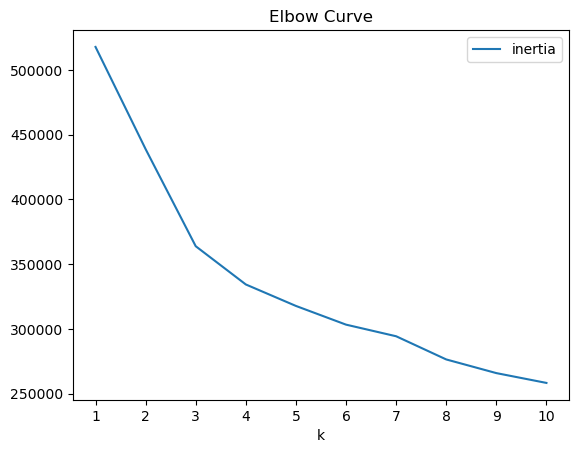

In [265]:
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [266]:
model = KMeans(n_clusters=4, n_init='auto', random_state=0)
model.fit(customers_pca_df)
k_3 = model.predict(customers_pca_df)
customer_pca_predictions_df = customers_pca_df.copy()
customer_pca_predictions_df["customer_segments"] = k_3

In [267]:
model_k2 = KMeans(n_clusters=2, n_init='auto')
model_k2.fit(df_pca)

KMeans(n_clusters=2)

In [268]:
customer_segments_k2 = model_k2.predict(df_pca)
print(customer_segments_k2)

[0 0 0 ... 1 1 0]


In [269]:
customer_predictions = df_pca.copy()
customer_predictions["Customer Segment (k=2)"] = customer_segments_k2
customer_predictions.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -0.953538      -0.104090       -0.892284   4.024953       1.683039   
1   -1.118963      -0.846005       -0.892284  -1.359209       0.044782   
2   -0.457264      -0.844065       -0.397517  -0.646600       0.625557   
3   -0.788113      -0.007039       -0.892284   4.024953       1.417829   
4   -0.622689      -0.176371       -0.727362   4.024953       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0             4.016394                   -0.739109     -1.419814            1   
1            -0.684829                   -0.996863     -2.549975            0   
2             3.443074                   -0.739109      0.047412            1   
3             3.443074                   -0.996863      0.840507            1   
4             4.475050                   -0.481354     -0.924130            1   

   education_encoded  ...  person_home_ownership_RENT  \
0                  4  ...                         1.0   
1                  3  ...                         0.0   
2                  3  ...                         0.0   
3                  1  ...                         1.0   
4                  4  ...                         1.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  previous_loan_defaults_on_file_No  \
0                  0.0                                1.0   
1                  0.0                                0.0   
2                  0.0                                1.0   
3                  0.0                                1.0   
4                  0.0                                1.0   

   previous_loan_defaults_on_file_Yes  Customer Segment (k=2)  
0                                 0.0                       0  
1                                 1.0                       0  
2                                 0.0                       0  
3                                 0.0                       1  
4                                 0.0                       0  

[5 rows x 25 columns]

<Axes: title={'center': 'k=2'}, xlabel='loan_amnt', ylabel='credit_score'>

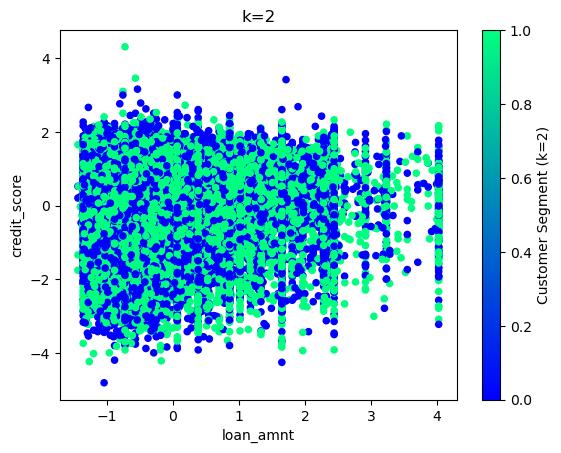

In [270]:
customer_predictions.plot.scatter(
    x="loan_amnt", 
    y="credit_score", 
    c="Customer Segment (k=2)",
    title = "k=2",
    colormap='winter'
)

SEPARATE X AND Y DATA

In [271]:
y = new_df['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [272]:
y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [273]:
X = new_df.drop('loan_status', axis=1)
X

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       education_encoded  person_gender_female  ...  \
0                      4                   1.0  ...   
1                      3                   1.0  ...   
2                      3                   1.0  ...   
3                      1                   1.0  ...   
4                      4                   0.0  ...   
...                  ...                   ...  ...   
44995                  0                   0.0  ...   
44996                  0                   1.0  ...   
44997                  0                   0.0  ...   
44998                  1                   0.0  ...   
44999                  3                   0.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
0                            0.0                         1.0   
1                            1.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         1.0   
4                            0.0                         1.0   
...                          ...                         ...   
44995                        0.0                         1.0   
44996                        0.0                         1.0   
44997                        0.0                         1.0   
44998                        0.0                         1.0   
44999                        0.0                         1.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                                0.0                    0.0   
1                                0.0                    1.0   
2                                0.0                    0.0   
3                                0.0                    0.0   
4                                0.0                    0.0   
...                              ...                    ...   
44995                            0.0                    0.0   
44996                            0.0                    0.0   
44997                            1.0                    0.0   
44998                            0.0                    1.0   
44999                            1.0                    0.0   

       loan_intent

PERFORM TRAIN TEST SPLIT

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [275]:
X_train

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
22509        34.0        43400.0              10     7200.0          14.84   
20076        30.0        21005.0              10     4000.0          14.22   
8901         23.0        56537.0               2     8000.0          10.65   
24694        29.0        90873.0               5    12000.0           7.51   
16117        23.0        26896.0               1     6000.0          14.42   
...           ...            ...             ...        ...            ...   
16304        23.0        24977.0               1     5950.0          13.49   
79           24.0       100332.0               1    28000.0          15.99   
12119        24.0        97123.0               2    18000.0           7.90   
14147        23.0       120911.0               0     7000.0           8.59   
38408        24.0        92075.0               0    20000.0           9.11   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
22509                 0.17                        10.0           654   
20076                 0.19                         7.0           607   
8901                  0.14                         4.0           681   
24694                 0.13                         5.0           649   
16117                 0.22                         2.0           632   
...                    ...                         ...           ...   
16304                 0.24                         3.0           538   
79                    0.28                         4.0           634   
12119                 0.19                         2.0           683   
14147                 0.06                         3.0           539   
38408                 0.22                         3.0           546   

       education_encoded  person_gender_female  ...  \
22509                  3                   1.0  ...   
20076                  3                   0.0  ...   
8901                   4                   1.0  ...   
24694                  0                   0.0  ...   
16117                  1                   0.0  ...   
...                  ...                   ...  ...   
16304                  3                   0.0  ...   
79                     3                   0.0  ...   
12119                  0                   0.0  ...   
14147                  3                   1.0  ...   
38408                  3                   0.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
22509                        0.0                         1.0   
20076                        0.0                         1.0   
8901                         0.0                         1.0   
24694                        1.0                         0.0   
16117                        0.0                         1.0   
...                          ...                         ...   
16304                        0.0                         1.0   
79                           0.0                         1.0   
12119                        0.0                         0.0   
14147                        0.0                         0.0   
38408                        0.0                         0.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
22509                            0.0                    0.0   
20076                            0.0                    0.0   
8901                             0.0                    0.0   
24694                            0.0                    0.0   
16117                            0.0                    0.0   
...                              ...                    ...   
16304                            0.0                    0.0   
79                               0.0                    0.0   
12119                            0.0                    0.0   
14147                            0.0                    0.0   
38408                            0.0                    1.0   

       loan_intent

In [276]:
X_test

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
38507        26.0        53735.0               3     4500.0           6.57   
42743        28.0        37096.0               8    14800.0          11.14   
13105        23.0       106467.0               1    10000.0           7.51   
24431        28.0        63685.0               2    10000.0          12.69   
2181         23.0        62148.0               0    13500.0          12.23   
...           ...            ...             ...        ...            ...   
31784        43.0       170084.0              21    15000.0          12.53   
11671        25.0        91137.0               4     5600.0          10.62   
30368        42.0        63584.0              19    21000.0          10.38   
35260        29.0       162898.0               3    11000.0           9.79   
33780        22.0        72823.0               0     5000.0          13.48   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
38507                 0.08                         3.0           660   
42743                 0.40                         7.0           686   
13105                 0.09                         2.0           645   
24431                 0.16                         7.0           673   
2181                  0.22                         2.0           692   
...                    ...                         ...           ...   
31784                 0.09                        16.0           688   
11671                 0.06                         2.0           657   
30368                 0.33                        13.0           674   
35260                 0.07                         8.0           704   
33780                 0.07                         2.0           635   

       education_encoded  person_gender_female  ...  \
38507                  0                   0.0  ...   
42743                  3                   1.0  ...   
13105                  3                   1.0  ...   
24431                  0                   0.0  ...   
2181                   4                   0.0  ...   
...                  ...                   ...  ...   
31784                  4                   0.0  ...   
11671                  3                   0.0  ...   
30368                  0                   1.0  ...   
35260                  1                   0.0  ...   
33780                  1                   0.0  ...   

       person_home_ownership_OWN  person_home_ownership_RENT  \
38507                        0.0                         1.0   
42743                        0.0                         1.0   
13105                        0.0                         0.0   
24431                        0.0                         1.0   
2181                         0.0                         1.0   
...                          ...                         ...   
31784                        0.0                         0.0   
11671                        1.0                         0.0   
30368                        0.0                         0.0   
35260                        0.0                         0.0   
33780                        0.0                         1.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
38507                            0.0                    1.0   
42743                            0.0                    0.0   
13105                            0.0                    1.0   
24431                            0.0                    0.0   
2181                             1.0                    0.0   
...                              ...                    ...   
31784                            0.0                    0.0   
11671                            0.0                    1.0   
30368                            0.0                    0.0   
35260                            0.0                    0.0   
33780                            0.0                    0.0   

       loan_intent

Logistic Regression Model 

In [277]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)

print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")


Training Data Score: 0.8865833333333333
Testing Data Score: 0.8856666666666667


c:\Users\tbord\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [278]:
lr_results_df = pd.DataFrame({"Prediction": lr_pred, "Actual": y_train})
lr_results_df

Prediction  Actual
22509           1       1
20076           1       1
8901            0       0
24694           0       0
16117           1       1
...           ...     ...
16304           1       0
79              1       1
12119           0       0
14147           0       0
38408           0       0

[36000 rows x 2 columns]

In [279]:
lr_testing_pred = lr.predict(X_test)
lr_results_df = pd.DataFrame({
    "Testing Data Predictions": lr_testing_pred, 
    "Testing Data Actual Targets": y_test})
lr_results_df

Testing Data Predictions  Testing Data Actual Targets
38507                         0                            0
42743                         1                            1
13105                         0                            0
24431                         1                            0
2181                          0                            0
...                         ...                          ...
31784                         0                            0
11671                         0                            0
30368                         1                            0
35260                         0                            0
33780                         0                            0

[9000 rows x 2 columns]

In [327]:
mse = mean_squared_error(y_test,lr_testing_pred)
lr_acc_score = accuracy_score(y_test, lr_testing_pred)
conf_matrix = confusion_matrix(y_test, lr_testing_pred)
f1_score_lr_model = f1_score(y_test, lr_testing_pred)

print(f"Mean Squared Error : {mse}")
print(f"Logistic Regression Accuracy Score : {lr_acc_score}")
print(f"LR F1 Score: {f1_score_lr_model}")
print(f"Confusion Matrix:")
print(conf_matrix)

Mean Squared Error : 0.3451111111111111
Logistic Regression Accuracy Score : 0.6548888888888889
LR F1 Score: 0.22077270446562972
Confusion Matrix:
[[5454 1536]
 [1570  440]]


SVC MODEL (DO NOT RUN, TAKES WAY TOO LONG!!!)

In [284]:
# scaler = StandardScaler().fit(X_train)

# # Scale the training data
# X_train_scaled = scaler.transform(X_train)

# # Scale the test data
# X_test_scaled = scaler.transform(X_test)

# svc_model = SVC(kernel='poly')

# param_grid = {
#     'C': [0.1, 1, 10],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto', 0.1, 1],
#     'coef0': [0.0, 1.0]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters:", grid_search.best_params_)

In [285]:
# # Get the best estimator
# best_svc = grid_search.best_estimator_

# # Make predictions on the test data
# best_svc_pred = best_svc.predict(X_test_scaled)

# print("Accuracy score:", grid_search.score(X_test_scaled, y_test))

In [286]:
# svc_model.fit(X_train, y_train)

# svc_pred = svc_model.predict(X_test_scaled)
# svc_acc_score = accuracy_score(y_test, svc_pred)

# print('Train Accuracy: %.3f' % svc_model.score(X_train, y_train))
# print('Test Accuracy: %.3f' % svc_model.score(X_test, y_test))
# print(f"Accuracy Score : {svc_acc_score}")

K-NEAREST NEIGHBORS MODEL 

In [287]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.902/0.825
k: 5, Train/Test Score: 0.879/0.832
k: 7, Train/Test Score: 0.870/0.831
k: 9, Train/Test Score: 0.864/0.839
k: 11, Train/Test Score: 0.860/0.837
k: 13, Train/Test Score: 0.858/0.837
k: 15, Train/Test Score: 0.856/0.839
k: 17, Train/Test Score: 0.853/0.837
k: 19, Train/Test Score: 0.853/0.838


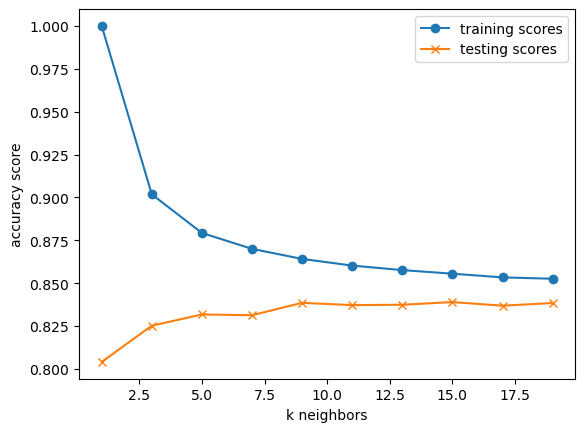

In [288]:
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [289]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Use GridSearchCV to find the best value for n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors
print(grid_search.best_params_)

{'n_neighbors': 15}


In [325]:
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_y_pred)

f1_score_knn_model = f1_score(y_test, knn_y_pred)

print(f"KNN Accuracy Score : {knn_acc_score}")
print(f"KNN F1 Score: {f1_score_knn_model}")

KNN Accuracy Score : 0.8334444444444444
KNN F1 Score: 0.5610541727672035


EXTREME GRADIENT BOOSTING - XGBOOST MODEL 

In [324]:
# scaler = StandardScaler().fit(X_train)

# # Scale the training data
# X_train_scaled = scaler.transform(X_train)

# # Scale the test data
# X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)
xgb_model.fit(X_train,y_train)

xgb_y_pred = xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_y_pred)

f1_score_xgb_model = f1_score(y_test, xgb_y_pred)

print(f"Training Data Score: {xgb_model.score(X_train, y_train)}")
print(f'Testing Score: {xgb_model.score(X_test, y_test)}')
print(f"XGB Accuracy Score : {xgb_acc_score}")
print(f"XGB F1 Score: {f1_score_xgb_model}")

Training Data Score: 0.92225
Testing Score: 0.8782222222222222
XGB Accuracy Score : 0.8782222222222222
XGB F1 Score: 0.7078891257995735


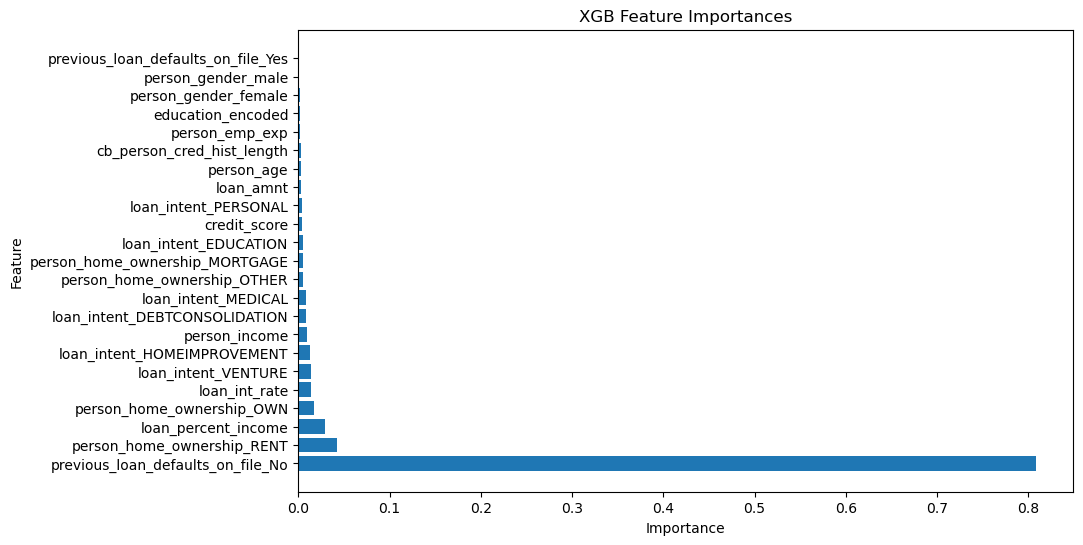

In [292]:
xgb_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': xgb_importances})
xgb_feature_importances = xgb_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importances['feature'], xgb_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGB Feature Importances')
plt.show()

RANDOM FOREST MODEL

In [ ]:
#Create and Fit a Random Forest model

# Create the StandardScaler instance
# Fit the Standard Scaler with the training data
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)


# Train a Random Forest Classifier model and print the model score
rfc_model = RandomForestClassifier(n_estimators=128, random_state=1)
rfc_model.fit(X_train_scaled, y_train)

rfc_predictions = rfc_model.predict(X_test_scaled)

rfc_acc_score = accuracy_score(y_test, rfc_predictions)

f1_score_rfc_model = f1_score(y_test, xgb_y_pred)

# Evaluate the model and print the model score
# The training data score indicates overfitting!!!!!!!!!!!!
print(f"Training Data Score: {rfc_model.score(X_train_scaled, y_train)}")
print(f'Testing Score: {rfc_model.score(X_test_scaled, y_test)}')
print(f"Random Forest Accuracy Score : {rfc_acc_score}")
print(f"Random Forest F1 Score: {f1_score_rfc_model}")

Training Data Score: 1.0
Testing Score: 0.8775555555555555
Random Forest Accuracy Score : 0.8775555555555555
Random Forest F1 Score: 0.7078891257995735


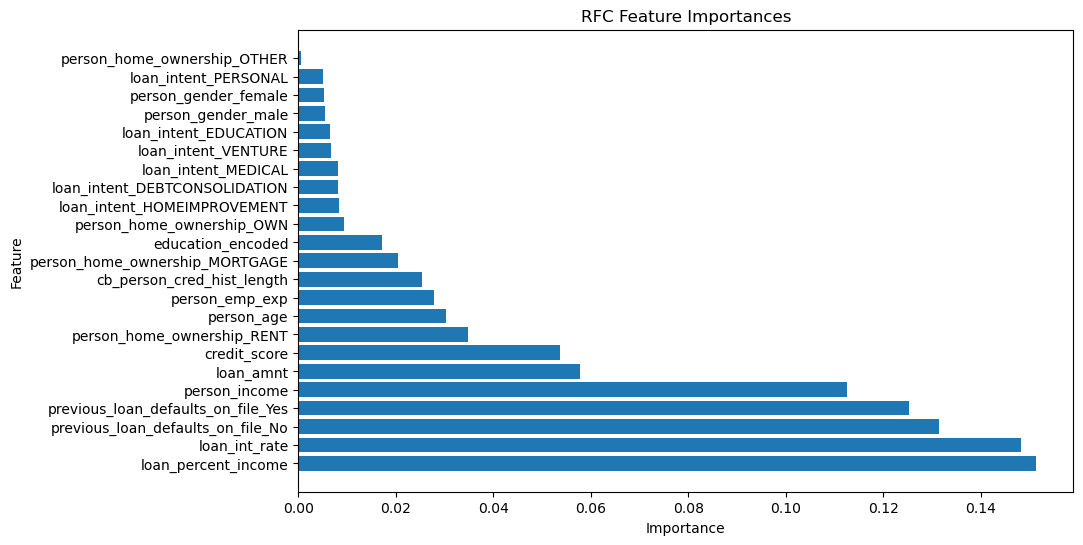

In [294]:
rfc_importances = rfc_model.feature_importances_
rfc_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rfc_importances})
rfc_feature_importances = rfc_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rfc_feature_importances['feature'], rfc_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('RFC Feature Importances')
plt.show()

DECISION TREE

In [330]:
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Create the decision tree classifier instance
tree_model = tree.DecisionTreeClassifier()

# Fit the Decision Tree model
tree_model = tree_model.fit(X_train_scaled, y_train)

# Making predictions using the decision tree data
tree_predictions = tree_model.predict(X_test_scaled)

# Calculate the accuracy score
tree_acc_score = accuracy_score(y_test, tree_predictions)

#Calculate the F1 score
f1_score_tree_model = f1_score(y_test, tree_predictions)

print(f"Training Data Score: {tree_model.score(X_train_scaled, y_train)}")
print(f'Testing Score: {tree_model.score(X_test_scaled, y_test)}')
print(f"Decision Tree Accuracy Score : {tree_acc_score}")
print(f"Decision Tree F1 Score: {f1_score_tree_model}")

Training Data Score: 1.0
Testing Score: 0.8571111111111112
Decision Tree Accuracy Score : 0.8571111111111112
Decision Tree F1 Score: 0.684029484029484


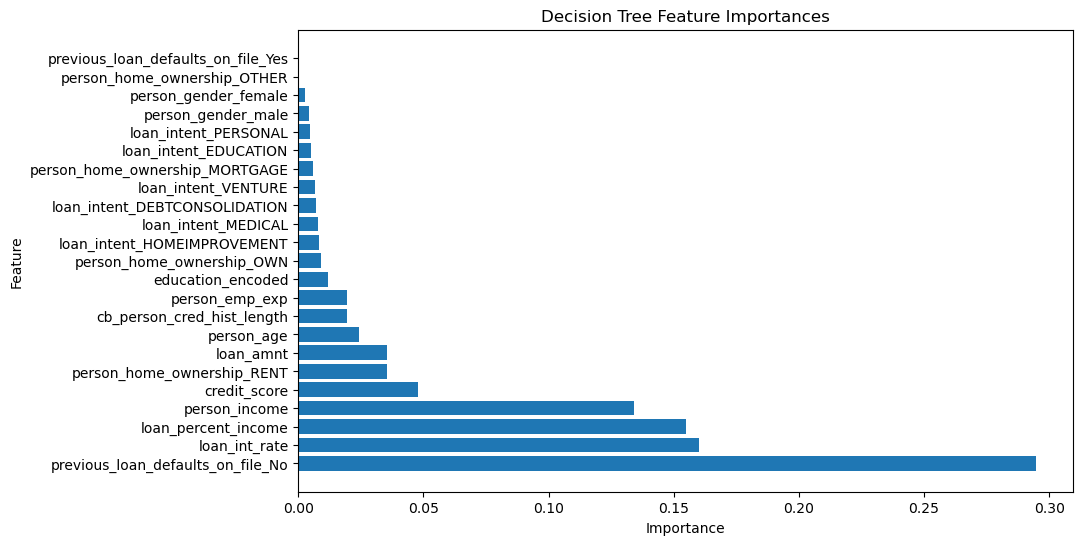

In [296]:
tree_importances = tree_model.feature_importances_
tree_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': tree_importances})
tree_feature_importances = tree_feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(tree_feature_importances['feature'], tree_feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

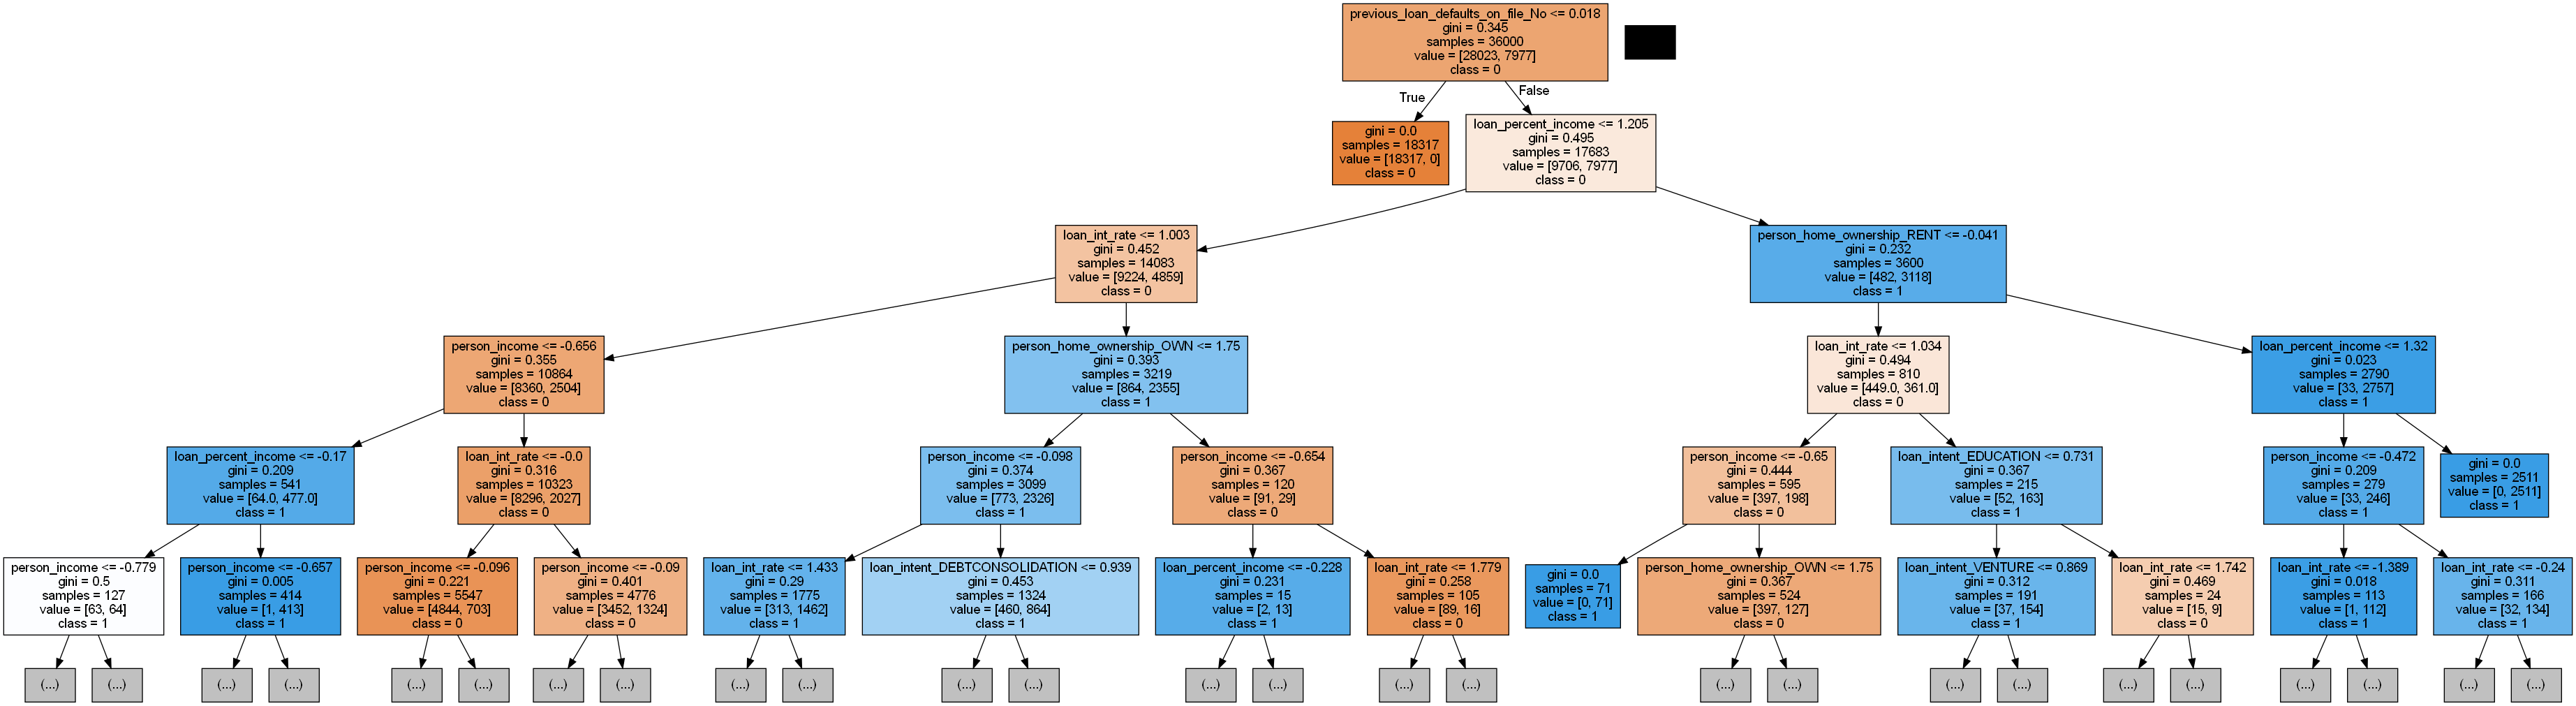

In [297]:
# Visualize the decision tree
# Create DOT data
dot_data = tree.export_graphviz(
    tree_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [298]:
# Save the tree as PDF
file_path = 'images/ML_Bank_tree.pdf'
graph.write_pdf(file_path)
# Save the tree as PNG
file_path = 'images/ML_Bank_tree.png'
graph.write_png(file_path)

True

EXTRA TREES MODEL

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
extra_model = tree.ExtraTreeClassifier()
extra_model = extra_model.fit(X_train_scaled, y_train)
predictions = extra_model.predict(X_test_scaled)
et_acc_score = accuracy_score(y_test, predictions)
f1_score_extra_model = f1_score(y_test, predictions)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(f"Extra Trees Accuracy Score : {et_acc_score}")
print(f"Extra Trees F1 Score: {f1_score_extra_model}")

Training Score: 1.0
Testing Score: 0.8749333333333333
Extra Trees Accuracy Score : 0.8270222222222222
Extra Trees F1 Score: 0.610176282051282


SMOTE


In [300]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [301]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_scaled, y_train)

In [302]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

loan_status
0    26232
1    26232
Name: count, dtype: int64

In [303]:
# Instantiate a new RandomForestClassier model 
smote_model = RandomForestClassifier()

# Fit the resampled data to the new model
smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [304]:
# Predict labels for original scaled testing features
y_pred = rfc_model.predict(X_test_scaled)


In [305]:
# Predict labels for resampled testing features
smote_y_pred = smote_model.predict(X_test_scaled)

In [306]:
# Print classification reports
print(f"Classification Report - Random Forest Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))

Classification Report - Random Forest Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8768
           1       0.99      0.95      0.97      2482

    accuracy                           0.99     11250
   macro avg       0.99      0.97      0.98     11250
weighted avg       0.99      0.99      0.99     11250

---------
Classification Report - Resampled Data - SMOTE
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8768
           1       0.78      0.86      0.82      2482

    accuracy                           0.92     11250
   macro avg       0.87      0.89      0.88     11250
weighted avg       0.92      0.92      0.92     11250



SMOTEENN

In [307]:
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [308]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [309]:
# Instantiate a new RandomForestClassier model
smoteenn_model = RandomForestClassifier()

# Fit the resampled data the new model
smoteenn_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [310]:
# Predict labels for resampled testing features
smoteenn_y_pred = smoteenn_model.predict(X_test_scaled)

In [311]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8768
           1       0.99      0.95      0.97      2482

    accuracy                           0.99     11250
   macro avg       0.99      0.97      0.98     11250
weighted avg       0.99      0.99      0.99     11250

---------
Classification Report - Resampled Data - SMOTEENN
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8768
           1       0.65      0.94      0.77      2482

    accuracy                           0.87     11250
   macro avg       0.81      0.90      0.84     11250
weighted avg       0.91      0.87      0.88     11250



LOAN PRE-APPROVAL SIMPLE

In [341]:
# Choose which Model to use for loan pre-approval based on accuracy score and F1 score
print(f"KNN Accuracy Score : {knn_acc_score}, KNN F1 Score : {f1_score_knn_model}")
print(f"Extra Trees Accuracy Score : {et_acc_score}, Extra Trees F1 Score : {f1_score_extra_model}")
print(f"Logistic Regression Accuracy Score : {lr_acc_score}, Logistic Regression F1 Score : {f1_score_lr_model}")
print(f"Decision Tree Accuracy Score : {tree_acc_score}, Decision Tree F1 Score : {f1_score_tree_model}")
print(f"Random Forest Accuracy Score : {rfc_acc_score}, Random Forest F1 Score : {f1_score_rfc_model}")
print(f"XGB Accuracy Score : {xgb_acc_score}, XCB F1 Score : {f1_score_xgb_model}")

KNN Accuracy Score : 0.8334444444444444, KNN F1 Score : 0.5610541727672035
Extra Trees Accuracy Score : 0.8270222222222222, Extra Trees F1 Score : 0.610176282051282
Logistic Regression Accuracy Score : 0.6548888888888889, Logistic Regression F1 Score : 0.22077270446562972
Decision Tree Accuracy Score : 0.8571111111111112, Decision Tree F1 Score : 0.684029484029484
Random Forest Accuracy Score : 0.8775555555555555, Random Forest F1 Score : 0.7078891257995735
XGB Accuracy Score : 0.8782222222222222, XCB F1 Score : 0.7078891257995735


In [313]:
loan_df = new_df[['person_income','person_age','loan_amnt','credit_score','previous_loan_defaults_on_file_No','loan_status']]
loan_df.head()

person_income  person_age  loan_amnt  credit_score  \
0        71948.0        22.0    35000.0           561   
1        12282.0        21.0     1000.0           504   
2        12438.0        25.0     5500.0           635   
3        79753.0        23.0    35000.0           675   
4        66135.0        24.0    35000.0           586   

   previous_loan_defaults_on_file_No  loan_status  
0                                1.0            1  
1                                0.0            0  
2                                1.0            1  
3                                1.0            1  
4                                1.0            1

In [314]:
loan_df = new_df[['person_age','person_income','credit_score','loan_amnt','loan_status','previous_loan_defaults_on_file_No']]

y = loan_df['loan_status']
X = loan_df.drop('loan_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# loan_lr = LogisticRegression()
# loan_lr.fit(X_train, y_train,)
# loan_lr_predictions = loan_lr.predict(X_train)
# loan_lr_test_predictions = loan_lr.predict(X_test)
# loan_mse = mean_squared_error(y_test,loan_lr_test_predictions)
# loan_acc_score = accuracy_score(y_test, loan_lr_test_predictions)
# print(f"Mean Squared Error : {loan_mse}")
# print(f"Logistic Regression Loan Pre-Approval Accuracy Score : {loan_acc_score}")

loan_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)
loan_xgb.fit(X_train,y_train)
loan_xgb_test = loan_xgb.predict(X_test)
loan_xgb_acc_score = accuracy_score(y_test, loan_xgb_test)

# print(f"Training Data Score: {loan_xgb.score(y_train, X_train)}")
#print(f'Testing Score: {loan_xgb.score(y_test, X_test)}')
print(f"XGB Loan Pre-Approval Accuracy Score : {loan_xgb_acc_score}")

XGB Loan Pre-Approval Accuracy Score : 0.8782222222222222


In [315]:
#Loan Approval
def loan_approval(person_age, person_income, credit_score, loan_amnt, previous_default):
    user_input = pd.DataFrame({'person_age': [person_age],'person_income': [person_income], 'credit_score': [credit_score], 'loan_amnt':[loan_amnt], 'previous_loan_defaults_on_file_No':[previous_default]})
    prediction = loan_xgb.predict(user_input)
    if prediction > 0.5:
        return 'Loan Approved'
    else:
        return 'Loan Denied'
    
# Store user input
person_age = float(input("Enter your age: "))
person_income = float(input("Enter your income: "))
credit_score = int(input("Enter your credit score: "))
loan_amnt = float(input("Enter the loan amount: "))
previous_default = float(input("Do you have any previous defaults on file (Yes / No): "))

# Make a prediction
result = loan_approval(person_age, person_income, credit_score, loan_amnt, previous_default)
print(result)

Loan Approved


LOAN APPROVAL PROGRAM

In [316]:
import tkinter as tk
from tkinter import messagebox

# Function to process responses and give an answer
def process_response():
    try:
        # Get age input and validate
        age = int(age_entry.get())
        if age < 18:
            messagebox.showerror("Not eligible", "You must be at least 18 years old to apply for a loan.")
            return
        
        # Get income input and validate
        income = int(income_entry.get())
        if income < 10000:
            messagebox.showerror("Not eligible", "You must have an income of at least $10,000 to apply for a loan.")
            return

        #Get credit score input and validate
        credit_score = int(credit_score_entry.get())
        if credit_score < 300:
            messagebox.showerror("Not eligible", "You must have a valid credit score to apply for a loan.")
            return

        
        # Get loan type and amount
        response1 = question1_var.get()
        response2 = question2_var.get()
        
        # Determine the recommendation
        if response1 == "Personal" and response2 == "Low":
            result = "Consider a small personal loan with low interest."
        elif response1 == "Business" and response2 == "High":
            result = "Consider a business term loan with a higher amount."
        elif response1 == "Education" and response2 == "Low":
            result = "An education loan with a subsidized rate might be ideal."
        else:
            result = "Please consult a financial advisor for more options."
        
        messagebox.showinfo("Recommendation", result)
    except ValueError:
        # Handle non-numeric input
        messagebox.showerror("Invalid Input", "Please enter a valid numeric input.")


# Create the main application window
app = tk.Tk()
app.title("Loan Advisor")

# Header
tk.Label(app, text="Loan Advisor").pack()

# Age Input
tk.Label(app, text="Enter your age:").pack()
age_entry = tk.Entry(app)
age_entry.pack()

# Income Input
tk.Label(app, text="Enter your annual income:").pack()
income_entry = tk.Entry(app)
income_entry.pack()

#Credit Score Input
tk.Label(app, text="Enter your credit score:").pack()
credit_score_entry = tk.Entry(app)
credit_score_entry.pack()


# Question 1: Loan type request
tk.Label(app, text="What type of loan are you looking for?").pack()
question1_var = tk.StringVar()
tk.Radiobutton(app, text="Personal", variable=question1_var, value="Personal").pack()
tk.Radiobutton(app, text="Business", variable=question1_var, value="Business").pack()
tk.Radiobutton(app, text="Education", variable=question1_var, value="Education").pack()
tk.Radiobutton(app, text="Debt Consolidation", variable=question1_var, value="Debt Consolidation").pack()
tk.Radiobutton(app, text="Medical", variable=question1_var, value="Medical").pack()
tk.Radiobutton(app, text="Home Improvement", variable=question1_var, value="Home Improvement").pack()

# Question 2: Loan amount request
tk.Label(app, text="What is your required loan amount?").pack()
question2_var = tk.StringVar()  
tk.Radiobutton(app, text="Low (<$10,000)", variable=question2_var, value="Low").pack()
tk.Radiobutton(app, text="Medium ($10,000 - $50,000)", variable=question2_var, value="Medium").pack()
tk.Radiobutton(app, text="High (>$50,000)", variable=question2_var, value="High").pack()

# Question 3: Highest education level request
tk.Label(app, text="What is the highest education level you have obtained?").pack()
question3_var = tk.StringVar()  
tk.Radiobutton(app, text="High School Diploma", variable=question3_var, value='HS').pack()
tk.Radiobutton(app, text="Associate's Degree", variable=question3_var, value= 'Associate').pack()
tk.Radiobutton(app, text="Bachelor's Degree", variable=question3_var, value= 'Bachelor').pack()
tk.Radiobutton(app, text="Master's Degree", variable=question3_var, value = 'Master' ).pack()
tk.Radiobutton(app, text="Doctorate", variable=question3_var, value = 'Phd').pack()

#Loan Approval
def loan_approval(income, credit_score):
    user_input = pd.DataFrame({'income': [income], 'credit_score': [credit_score]})
    prediction = model.predict(user_input)
    if prediction > 0.5:
        return 'Loan Approved'
    else:
        return 'Loan Denied'
    
# Store user input
#user_data['age'] = age
#user_data['income'] = income
#user_data['credit_score'] = credit_score

# Make a prediction
#result = loan_approval(income, credit_score)
#print(result)

# Submit Button
tk.Button(app, text="Submit", command=process_response).pack()

# Run the application
app.mainloop()